# SGD example

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline

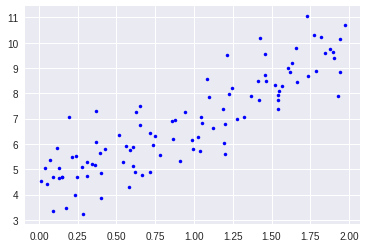

In [8]:
# 生成随机数据集
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
plt.plot(X, y, 'b.')

('BGD:', array([[4.21509616],
       [2.77011339]]))
('SGD:', array([[4.22352952],
       [2.77561526]]))


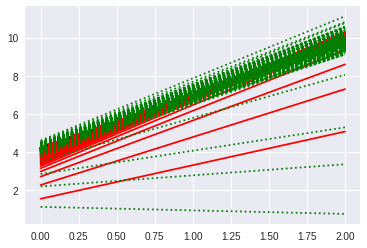

In [13]:
# Batch Gradient Descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2.0 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, 'r-')

print("BGD:", theta)

# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50
theta = np.random.randn(2, 1)


def learning_schedule(t):
    return float(t0) / (t + t1)


for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2.0 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'g:')

print("SGD:", theta)

[[4.20741477]
 [2.81806411]]


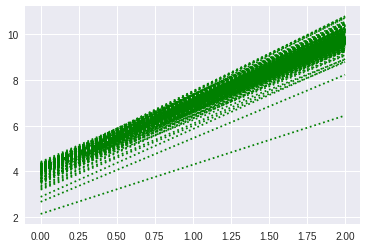

In [10]:
# Scikit-Learn SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(np.c_[sgd_reg.intercept_, sgd_reg.coef_].T)

In [11]:
# Scikit-Learn SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(np.c_[sgd_reg.intercept_, sgd_reg.coef_].T)

[[4.2046679 ]
 [2.77424383]]


# OLS 

simple linear regression implementation with example.

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

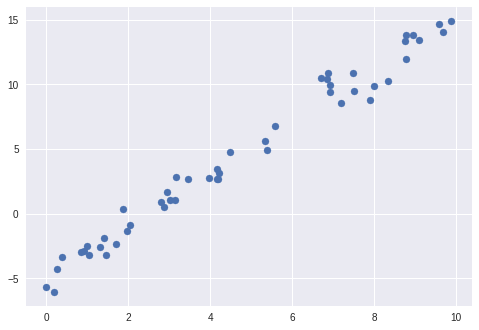

In [14]:
import seaborn as sns; sns.set()
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

('Model slope:    ', 2.0272088103606953)
('Model intercept:', -4.998577085553204)


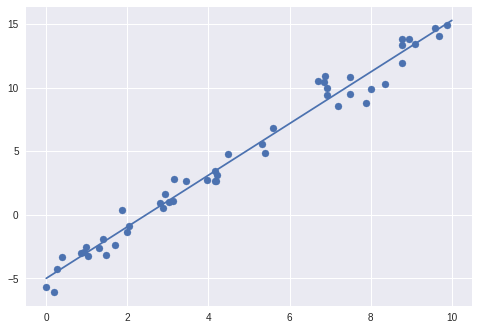

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])


print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

plt.scatter(x, y)
plt.plot(xfit, yfit);